# 图像处理之USM锐化

图像卷积处理实现锐化有一种常用的算法叫做Unsharpen Mask方法，这种锐化的方法就是对原图像先做一个高斯模糊，然后用原来的图像减去一个系数乘以高斯模糊之后的图像，然后再把值Scale到0～255的RGB像素值范围之内。基于USM锐化的方法可以去除一些细小的干扰细节和噪声，比一般直接使用卷积锐化算子得到的图像锐化结果更加真实可信。USM锐化公式表示如下：

（源图像– w*高斯模糊）/（1-w）；其中w表示权重（0.1～0.9），默认为0.6

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
import skimage
import skimage.io
import imageio

In [2]:
src = imageio.imread('../datas/f3.jpg')

In [3]:
def unsharpen_mask(src,weight=0.6):
    srcf = np.float32(src)
    weight = np.clip(weight,0.1,0.9)
    gauss = cv2.GaussianBlur(srcf,(5,5),2.4)
    dst = (srcf - weight * gauss) / (1.0 - weight)
    dst = np.clip(dst,0,255)
    return np.uint8(dst)

In [4]:
dst = unsharpen_mask(src)

Text(0.5,1,'DST')

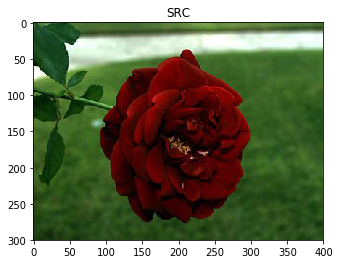

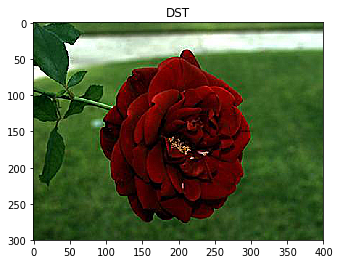

In [5]:
plt.figure()
plt.imshow(src)
plt.title('SRC')
plt.figure()
plt.imshow(dst)
plt.title('DST')